In [1]:
import anesthetic as ns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
chains = ns.read_chains("diffusion")

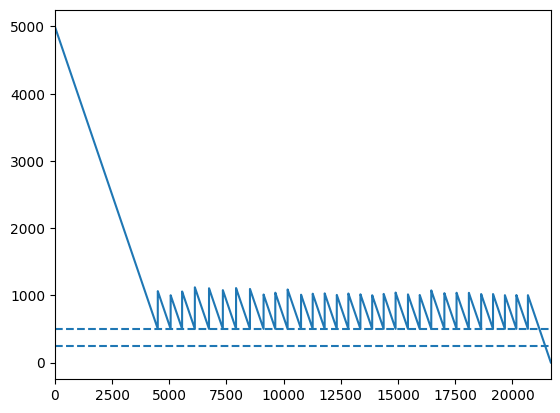

In [3]:
chains.nlive.plot()
plt.xlim(0,len(chains))
plt.hlines(250,0,len(chains),linestyles='dashed')
plt.hlines(500,0,len(chains),linestyles='dashed')

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


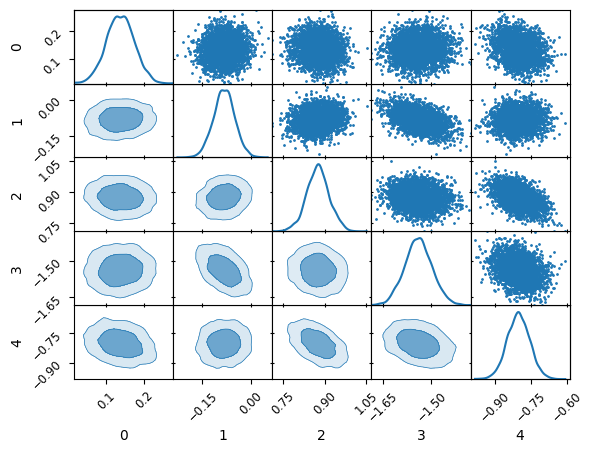

In [4]:
ns.MCMCSamples(chains.compress().to_numpy()[...,:5]).plot_2d()

In [59]:
import pickle
import numpy as np
from anesthetic import MCMCSamples
trace = pickle.load(open("trace.pkl", "rb"))


,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


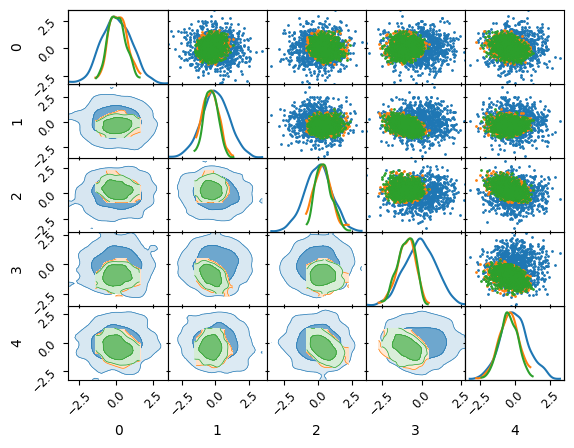

In [62]:

i=list(trace.live.keys())[0]
# diff = np.asarray(trace.diff[i])
live = np.asarray([xi.x for xi in trace.live[i]])
points = np.asarray([xi.x for xi in trace.accepted_live[i]])
prior = np.asarray(trace.prior[i].squeeze())
# a = MCMCSamples(diff).plot_2d()
a=MCMCSamples(prior).plot_2d()
a=MCMCSamples(live).plot_2d(a)
MCMCSamples(points).plot_2d(a)
# len(diff), len(live), len(points)

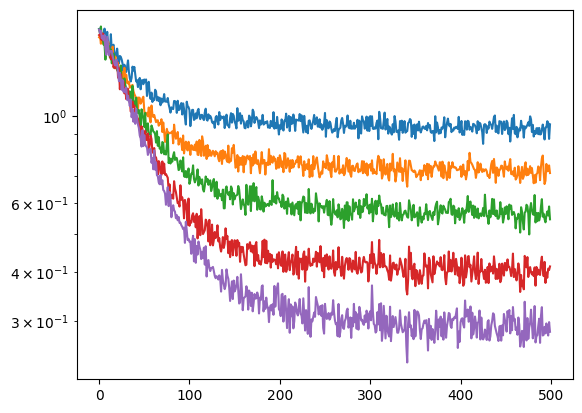

In [61]:
import matplotlib.pyplot as plt
for k in trace.losses.keys():
    plt.yscale("log")
    plt.plot(trace.losses[k])

In [8]:
live_x = np.asarray([y.x for y in trace.live[trace.iteration[-2]]])
active_x = np.asarray([y.x for y in trace.accepted_live[trace.iteration[-2]]])
# diff_x = np.asarray([y.x for y in trace.diff[trace.iteration[-3]]])

In [9]:
trace.diff

{}

,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


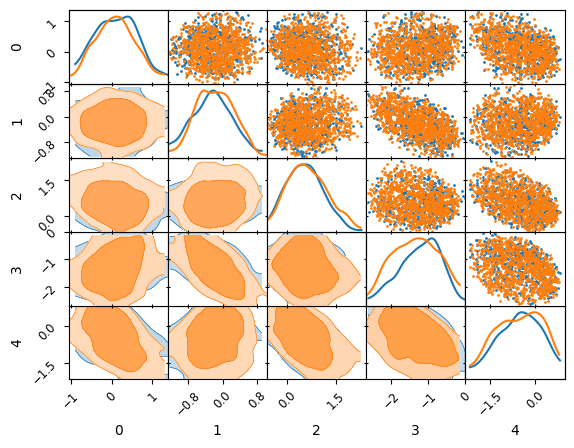

In [10]:
a=MCMCSamples(live_x).plot_2d()
MCMCSamples(active_x).plot_2d(a)

In [11]:
from fusions.cfm import CFM
from fusions.utils import unit_hyperball

In [12]:
diff = CFM(n=5,latent=unit_hyperball(5))
diff.train(live_x,n_epochs=5000,noise = 1e-5)
x = diff.rvs(500)


100%|██████████| 5000/5000 [00:08<00:00, 578.56it/s]


,0,1,2,3,4
0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


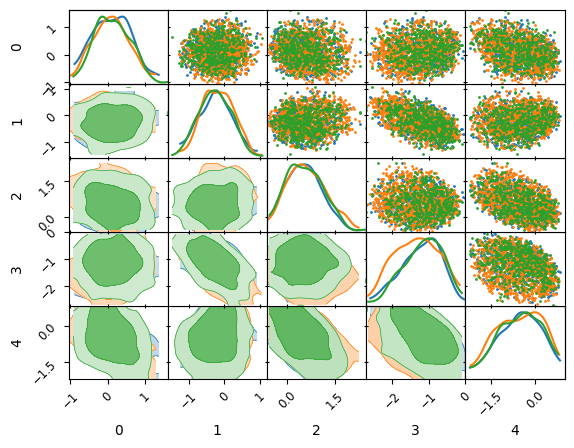

In [13]:
a=MCMCSamples(live_x).plot_2d()
MCMCSamples(active_x).plot_2d(a)
MCMCSamples(x).plot_2d(a)

In [14]:
chains.logX()
from scipy.special import logsumexp
logsumexp((chains.logdX(),chains.logL)) 

19.713694279621055

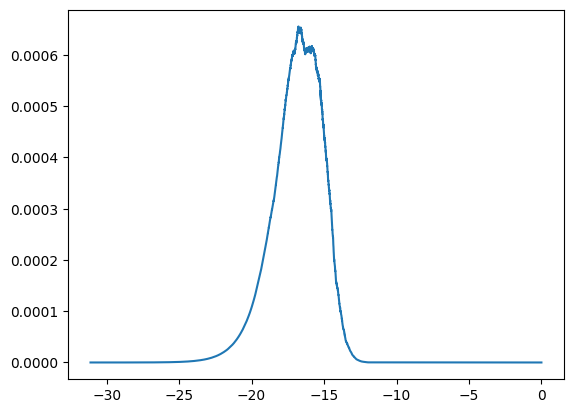

In [15]:
plt.plot(chains.logX(),np.exp(chains.logL + chains.logX()))


<Axes: >

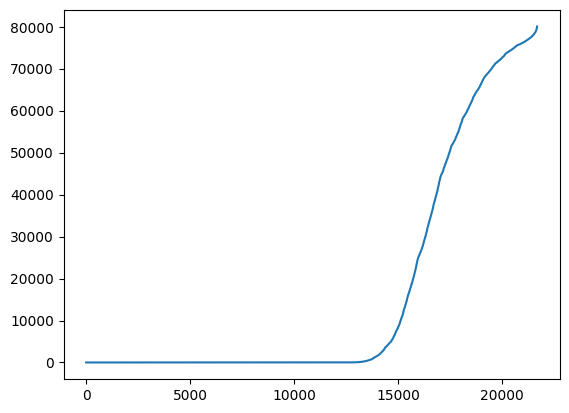

In [16]:
np.exp(chains.logL).plot()
# plt.yscale("log")
